<a href="https://colab.research.google.com/github/som-pat/Ryanair_NLP/blob/main/Ryanair_EDA_%26_Comments_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets
!pip install contractions
!pip install tensorflow keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.1 MB/s eta 0:00:00


In [60]:
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


import contractions
import re
import string
import codecs

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer,PorterStemmer

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Input, Dropout, Flatten
from tensorflow.keras.models import load_model

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
od.download("https://www.kaggle.com/datasets/cristaliss/ryanair-reviews-ratings/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: somyapatra
Your Kaggle Key: ··········


100%|██████████| 630k/630k [00:00<00:00, 26.8MB/s]

In [89]:
ryanair = pd.read_csv('/content/ryanair-reviews-ratings/ryanair_reviews.csv')

In [6]:
pd.set_option('display.max_columns', None)
ryanair.head()

,Unnamed: 0,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Aircraft,Type Of Traveller,Seat Type,Origin,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
0,0,2024-02-03,10.0,United Kingdom,Not Verified,"""bang on time and smooth flights""",Flew back from Faro to London Luton Friday 2nd...,Boeing 737 900,Family Leisure,Economy Class,Faro,Luton,February 2024,4.0,5.0,3.0,4.0,4.0,yes,NaN,NaN
1,1,2024-01-26,10.0,United Kingdom,Trip Verified,"""Another good affordable flight""",Another good affordable flight with Ryanair. O...,NaN,Couple Leisure,Economy Class,Belfast,Alicante,January 2024,3.0,5.0,3.0,5.0,5.0,yes,NaN,NaN
2,2,2024-01-20,10.0,United Kingdom,Trip Verified,“Really impressed!”,"Really impressed! You get what you pay for, th...",Boeing 737-800,Couple Leisure,Economy Class,Edinburgh,Paris Beauvais,October 2023,5.0,5.0,4.0,5.0,5.0,yes,NaN,NaN
3,3,2024-01-07,6.0,United Kingdom,Trip Verified,“a decent offering from Ryanair”,I should like to review my flight from Faro to...,Boeing 737,Solo Leisure,Economy Class,Faro,Liverpool,January 2024,3.0,2.0,1.0,3.0,3.0,yes,NaN,NaN
4,4,2024-01-06,10.0,Israel,Trip Verified,“cabin crew were welcoming and friendly”,"Flight left the gate ahead of schedule, fare w...",Boeing 737-800,Solo Leisure,Economy Class,Dublin,Manchester,January 2024,4.0,5.0,NaN,4.0,5.0,yes,NaN,NaN


In [7]:
print(ryanair.keys())
ryanair.info()

Index(['Unnamed: 0', 'Date Published', 'Overall Rating', 'Passenger Country',
       'Trip_verified', 'Comment title', 'Comment', 'Aircraft',
       'Type Of Traveller', 'Seat Type', 'Origin', 'Destination', 'Date Flown',
       'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Ground Service', 'Value For Money', 'Recommended',
       'Inflight Entertainment', 'Wifi & Connectivity'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249 entries, 0 to 2248
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2249 non-null   int64  
 1   Date Published          2249 non-null   object 
 2   Overall Rating          2119 non-null   float64
 3   Passenger Country       2249 non-null   object 
 4   Trip_verified           1305 non-null   object 
 5   Comment title           2249 non-null   object 
 6   Comment                 2249 non-null 

In [8]:
print(ryanair.Recommended.unique())
print(ryanair.Trip_verified.unique())
print(set(ryanair['Type Of Traveller']))
print(set(ryanair['Seat Type']))

['yes' 'no']
['Not Verified' 'Trip Verified' nan 'NotVerified' 'Verified Review'
 'Unverified']
{nan, 'Couple Leisure', 'Solo Leisure', 'Business', 'Family Leisure'}
{'Economy Class', 'Business Class', 'Premium Economy', 'First Class'}


In [9]:
ryanair.isnull().sum()

Unnamed: 0                   0
Date Published               0
Overall Rating             130
Passenger Country            0
Trip_verified              944
Comment title                0
Comment                      0
Aircraft                  1698
Type Of Traveller          614
Seat Type                    0
Origin                     615
Destination                615
Date Flown                 618
Seat Comfort               112
Cabin Staff Service        121
Food & Beverages           937
Ground Service             671
Value For Money              1
Recommended                  0
Inflight Entertainment    1918
Wifi & Connectivity       1981
dtype: int64

Since the analysi of service provided by Ryanair would not change much by taking into consideration the amount of missing data in Inflight entertainment and Wifi & Connectivity columns. They are to be dropped.

Food & Beverages is another column of concern since it also has a higher amount of missing data and it might affect the models predicitons.

Since the dataset has flight data for international tours the type of aircraft does not matter much because its normalised

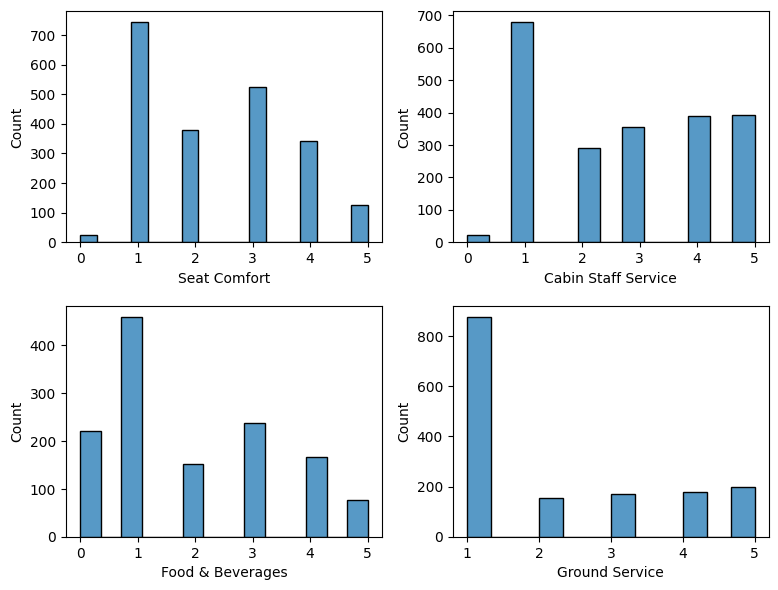

In [10]:
df2 = ryanair[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages','Ground Service']].copy()
# Nan issue
fig = plt.figure(dpi=100, figsize=(8, 6))
for i, column in enumerate(df2.columns, 1):
    plt.subplot(2,2,i)
    plt.tight_layout()
    sns.histplot(df2[column])


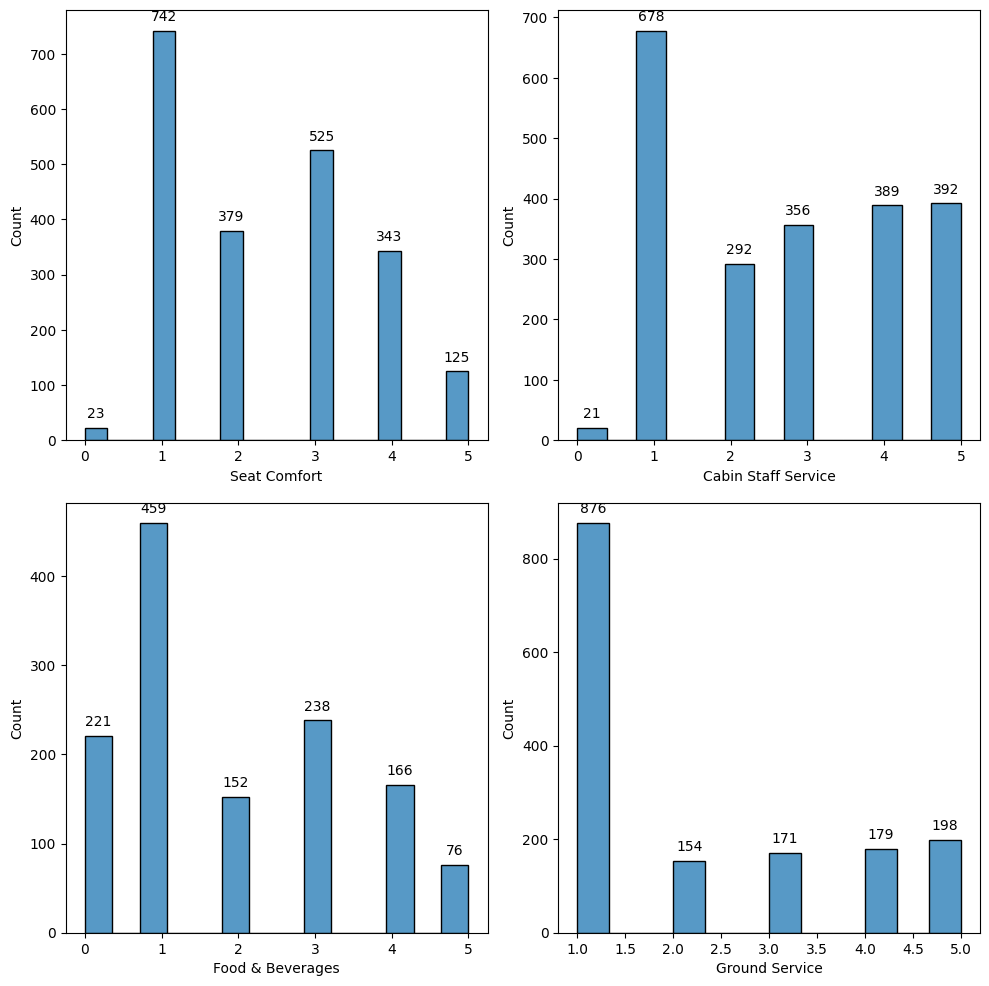

In [11]:
df2 = ryanair[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service']].copy()

fig, axes = plt.subplots(2, 2, figsize=(10, 10), dpi=100)
#For easier  Iteration over subplots
axes = axes.flatten()
for i, column in enumerate(df2.columns):
    sns.histplot(df2[column], ax=axes[i])

    # Add count above each bar
    for patch in axes[i].patches:
        if patch.get_height()>0:
            axes[i].annotate(format(patch.get_height()),
                                (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                                ha = 'center', va = 'center',
                                xytext = (0, 10),
                                textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [12]:
gs = {}
for i in range(len(ryanair)):
    if ryanair['Overall Rating'][i] not in gs:
        gs[ryanair['Overall Rating'][i]]=1
    else:
         gs[ryanair['Overall Rating'][i]]+=1

print(gs)

{10.0: 262, 6.0: 76, 1.0: 858, 5.0: 83, 8.0: 198, 3.0: 102, 9.0: 177, 2.0: 184, 7.0: 122, 4.0: 57, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 

Median Is appropriate since the columns are ratings and most of them are skewed to a particular value

In [13]:
Ser_Col = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages','Ground Service']
ryanair[Ser_Col] = ryanair[Ser_Col].fillna(ryanair[Ser_Col].median())

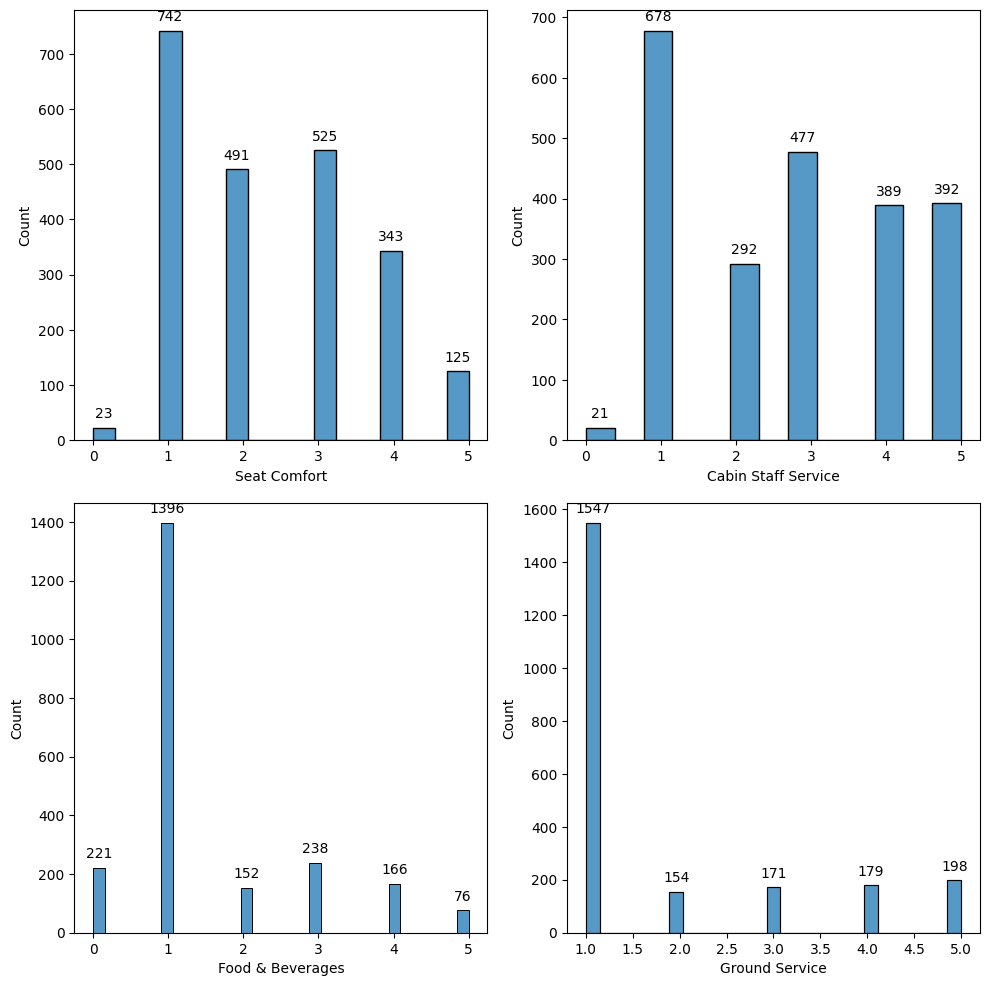

In [14]:
df2 = ryanair[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service']].copy()

fig, axes = plt.subplots(2, 2, figsize=(10, 10), dpi=100)
#For easier  Iteration over subplots
axes = axes.flatten()
for i, column in enumerate(df2.columns):
    sns.histplot(df2[column], ax=axes[i])

    # Add count above each bar
    for patch in axes[i].patches:
        if patch.get_height()>0:
            axes[i].annotate(format(patch.get_height()),
                                (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                                ha = 'center', va = 'center',
                                xytext = (0, 10),
                                textcoords = 'offset points')

plt.tight_layout()
plt.show()


In [ ]:
for i in range(len(ryanair)):
    if np.isnan(ryanair['Overall Rating'][i]):
        ryanair['Overall Rating'][i] = ((ryanair['Seat Comfort'][i]+ ryanair['Cabin Staff Service'][i]+ ryanair['Food & Beverages'][i]+
                                         ryanair['Ground Service'][i]+ryanair['Value For Money'][i])//5)*2


In [16]:
gs = {}
for i in range(len(ryanair)):
    if ryanair['Seat Comfort'][i] not in gs:
        gs[ryanair['Seat Comfort'][i]]=1
    else:
        gs[ryanair['Seat Comfort'][i]]+=1

print(gs)

{4.0: 343, 3.0: 525, 5.0: 125, 2.0: 491, 1.0: 742, 0.0: 23}


In [17]:
ryanair['Date Published'] = pd.to_datetime(ryanair['Date Published'])
# ryanair['Recommended'] = ryanair['Recommended'].astype(bool)
# ryanair['Inflight Entertainment'] = ryanair['Inflight Entertainment'].astype(float)
# ryanair['Wifi & Connectivity']= ryanair['Wifi & Connectivity'].astype(float)
ryanair['Trip_verified']=ryanair['Trip_verified'].astype(str)

In [ ]:
for i in range(ryanair.shape[0]):
    if ryanair['Trip_verified'].iloc[i] == 'nan':
        ryanair['Trip_verified'].iloc[i] = 'Unknown'
    elif ryanair['Trip_verified'].iloc[i] == 'NotVerified' or ryanair['Trip_verified'].iloc[i] == 'Unverified':
        ryanair['Trip_verified'].iloc[i] = 'Not Verified'
    elif ryanair['Trip_verified'].iloc[i] =='Verified Review':
        ryanair['Trip_verified'].iloc[i] = 'Trip Verified'


In [19]:
cat_col = ['Aircraft', 'Type Of Traveller', 'Origin', 'Destination']
ryanair[cat_col] = ryanair[cat_col].fillna('Unknown')

In [20]:
ryanair = ryanair.drop(columns='Unnamed: 0')

In [21]:
ryanair.isnull().sum()

Date Published               0
Overall Rating               0
Passenger Country            0
Trip_verified                0
Comment title                0
Comment                      0
Aircraft                     0
Type Of Traveller            0
Seat Type                    0
Origin                       0
Destination                  0
Date Flown                 618
Seat Comfort                 0
Cabin Staff Service          0
Food & Beverages             0
Ground Service               0
Value For Money              1
Recommended                  0
Inflight Entertainment    1918
Wifi & Connectivity       1981
dtype: int64

Recommendation on the basis of Seat comfort and also whether group or Solo Traveller


Recommended      no  yes
Overall Rating          
0.0              22    0
1.0             852    6
2.0             273    7
3.0              95    7
4.0              61    8
5.0              45   38
6.0              17   59
7.0               4  118
8.0               2  196
9.0               4  173
10.0              2  260


<Figure size 1200x600 with 0 Axes>

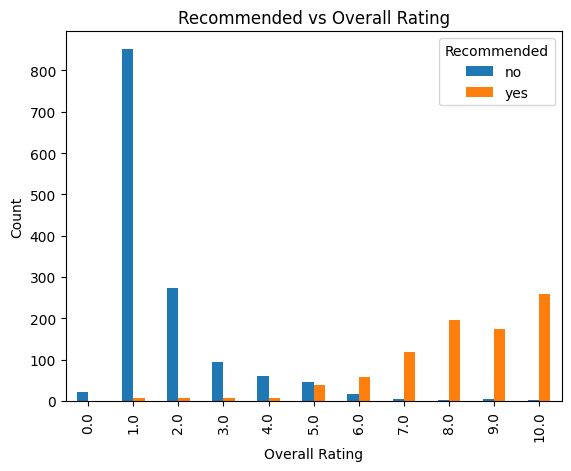

In [22]:
#@title Overall Rating vs Recommendation
fig = plt.figure(dpi=100, figsize=(12, 6))
count_rec_rate = ryanair.groupby(['Overall Rating','Recommended']).size().unstack(fill_value=0)
print(count_rec_rate)
count_rec_rate.plot(kind='bar',stacked=False)
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.title('Recommended vs Overall Rating')

# Show the plot
plt.show()

In [23]:
# Recommendation and Rating on the basis of Seat type, Comfort and Group or Solo Travellers
SeaGrou = ['Overall Rating','Seat Type','Seat Comfort','Type Of Traveller','Recommended']
df3 = ryanair[SeaGrou].copy()


<Axes: xlabel='Seat Type', ylabel='Seat Comfort'>

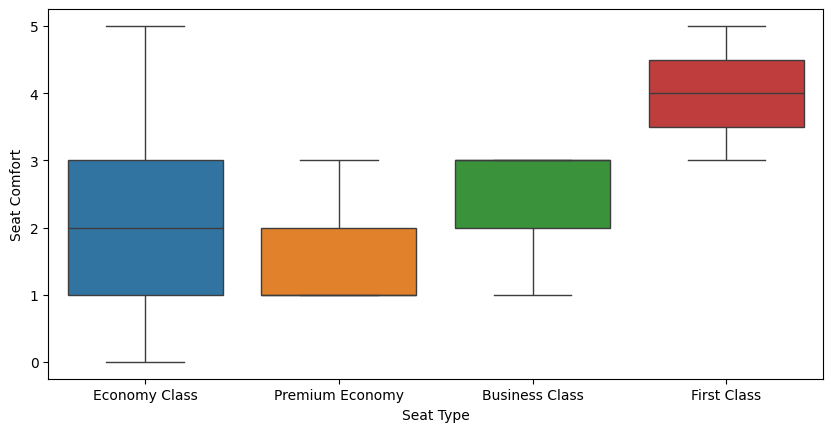

In [24]:
#@title 'Seat Type' vs 'Seat Comfort'
figsize = (10, 1.2 * len(df3['Seat Type'].unique()))
plt.figure(figsize=figsize)
sns.boxplot(df3,x='Seat Type',y='Seat Comfort',hue='Seat Type')


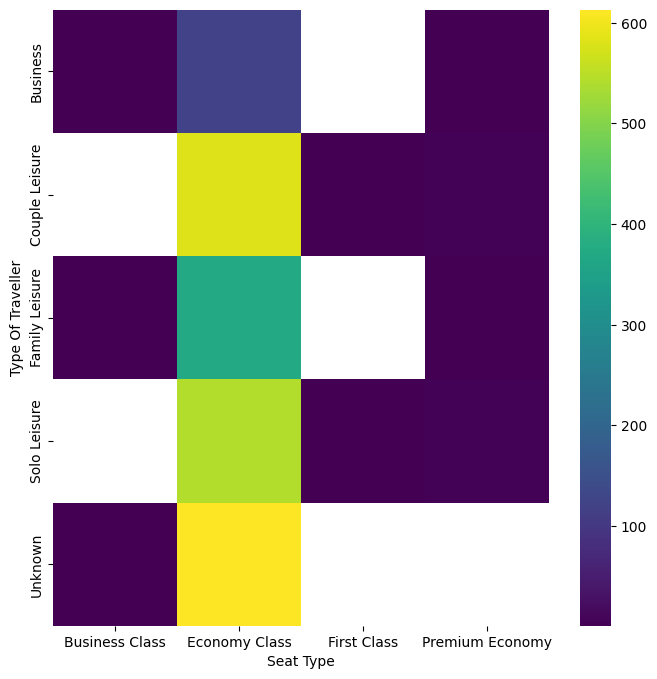

In [25]:
# @title Seat Type vs Type Of Traveller

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Type Of Traveller'].value_counts()
    for x_label, grp in df3.groupby('Seat Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Seat Type')
_ = plt.ylabel('Type Of Traveller')

Recommended         no  yes
Type Of Traveller          
Business            78   48
Couple Leisure     427  160
Family Leisure     257  117
Solo Leisure       329  219
Unknown            286  328


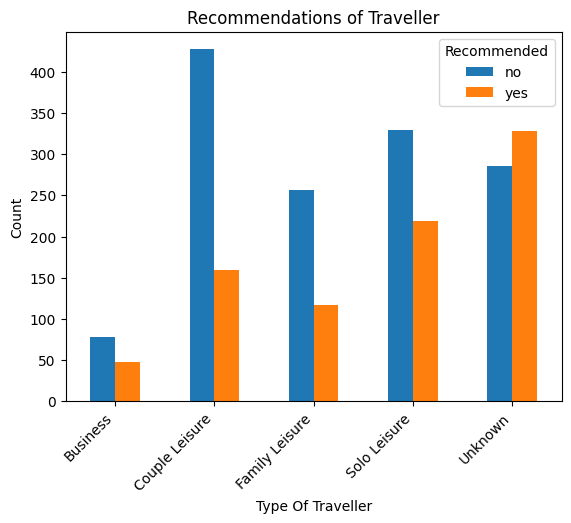

In [26]:
# @title Type of Traveller vs Overall Recommendations
count_traveller_type = ryanair.groupby(['Type Of Traveller','Recommended']).size().unstack(fill_value=0)
print(count_traveller_type)
count_traveller_type.plot(kind='bar',stacked=False)
plt.xlabel('Type Of Traveller')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Recommendations of Traveller')

# Show the plot
plt.show()


In [105]:
# @title Comment NLP
com_df = ['Comment title', 'Comment','Recommended']
comm_df = ryanair[com_df].copy()

comm_df.head(5)

,Comment title,Comment,Recommended
0,"""bang on time and smooth flights""",Flew back from Faro to London Luton Friday 2nd...,yes
1,"""Another good affordable flight""",Another good affordable flight with Ryanair. O...,yes
2,“Really impressed!”,"Really impressed! You get what you pay for, th...",yes
3,“a decent offering from Ryanair”,I should like to review my flight from Faro to...,yes
4,“cabin crew were welcoming and friendly”,"Flight left the gate ahead of schedule, fare w...",yes


In [106]:
def expand_contractions(comment):
    # Expand shortened version of phrases or words
    comment = contractions.fix(comment)

    return comment

In [107]:
def replace_numbers(comment):
    # Removal of numbers from tweet
    return re.sub('[0-9]+', '', comment)

In [108]:
def remove_ordinals(comment):
    # Define a regular expression pattern to match ordinal numbers
    ordinal_pattern = r'\b\d+(st|nd|rd|th)\b'
    # Replace ordinal numbers with an empty string
    cleaned_text = re.sub(ordinal_pattern, '', comment)
    return cleaned_text

In [109]:
nonstandard_dict = {
    'aint': 'am not',
    'gonna': 'going to',
    'gotta': 'got to',
    'hafta': 'have to',
    'wanna': 'want to',
    'coulda': 'could have',
    'woulda': 'would have',
    'shoulda': 'should have',
    'mighta': 'might have',
    'musta': 'must have',
    'ain\'t': 'am not',
    'kinda': 'kind of',
    'sorta': 'sort of'
}

In [110]:
def replace_nonstandard(comment, nonstandard_dict):
    # To replace slag words which are non-english words to their corresponding english words
    nonstd_comment = []
    for word in comment.split():
        if word in nonstandard_dict:
            nonstd_comment.append(nonstandard_dict[word])
        else:
            nonstd_comment.append(word)

    return ' '.join(nonstd_comment)

In [111]:
# Remove punctuations
punctuations = string.punctuation
def remove_punctuations(comment):
    # Removal of punctuations from tweets
    return comment.translate(str.maketrans('', '', punctuations))

In [112]:
StopWords_list = stopwords.words('english')
def remove_stopwords(comment):
    # Removal of stopwords from tweets which have no or less meaning to reduce noise
    return " ".join([word for word in str(comment).split() if word not in StopWords_list])

In [113]:
def tokenizer(comment):
    tokenizer = RegexpTokenizer(r'\w+|[^\w\s]')
    return tokenizer.tokenize(comment)


In [114]:
# Stem = PorterStemmer()
# def stemmer(comment):
#     return " ".join([Stem.stem(w) for w in comment])


In [115]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(comment):
  # Tag each word in the tweet with its corresponding part-of-speech.
  pos_tagged_comment = nltk.pos_tag(comment.split())
  # lemmatizer is applied to each word in the tweet using the WordNet POS tag. If the POS is not found in the wordnet dict, the default tag used is NOUN.
  return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_comment])

In [116]:
def preprocessing_comments(comment):
    comment = expand_contractions(comment)
    comment = remove_ordinals(comment)
    comment = replace_numbers(comment)
    comment = replace_nonstandard(comment, nonstandard_dict)
    comment = remove_punctuations(comment)
    comment = comment.lower()
    comment = remove_stopwords(comment)
    # comment = stemmer(comment)
    comment = lemmatize_words(comment)

    return comment

In [117]:
comm_df['Comment title'] = comm_df['Comment title'].apply(lambda x: preprocessing_comments(x))
comm_df['Comment'] = comm_df['Comment'].apply(lambda x: preprocessing_comments(x))

In [118]:
comm_df.head(10)

,Comment title,Comment,Recommended
0,bang time smooth flight,flew back faro london luton friday february ry...,yes
1,another good affordable flight,another good affordable flight ryanair time pl...,yes
2,“really impressed”,really impressed get pay flight cost £ seat so...,yes
3,“a decent offering ryanair”,like review flight faro liverpool ryanair book...,yes
4,“cabin crew welcome friendly”,flight leave gate ahead schedule fare really c...,yes
5,close online checkin hour,book fight copenhagen poland though bookingcom...,no
6,really good value,flight operate malta air always find cabin cre...,yes
7,ask pay backpack,staff rude manner let alone professional backp...,no
8,ground service staff really bad,ryanair ground service staff really bad proble...,no
9,make u pay show fee,want check online night flight nationality lis...,no


In [119]:
# print(ryanair['Comment'][0])
print(comm_df['Comment'][0])
# print(stemmer(ryanair['Comment'][0]))

flew back faro london luton friday february ryanair direction bang time smooth flight direction always sit front space comfortable hour flight cabin crew polite efficient nice sense humour especially engagement especially ethan female colleague front section human touch unlike sometimes stand offish ba crew merit mark
